# Mushroom Project

- Problem Statement:

Data Set Information:
This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.



In [2]:
#Generic
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

#Categorical to Numerical 
from sklearn.preprocessing import LabelEncoder 

#Classification 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Metrics
from sklearn.metrics import classification_report,confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score



In [22]:
#Uploading the Data 
dp= pd.read_csv("Desktop\QUERY\DATA trained projects/mushroom/mushroom.csv")

In [23]:
dp.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


 # EDA( Exploratory Data Analysis)

In [24]:
dp.shape

(8124, 23)

In [27]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

All the features are oject type 
NO null values 

In [28]:
dp.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Observation 
- unique values 
- veil-type	has only 1 values - so no use will drop that

# Data Cleaning 

In [38]:
ds=dp.drop(columns=['veil-type'])
ds

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


# Univariate analysis 

In [39]:
col= ds.columns
len(col)

22

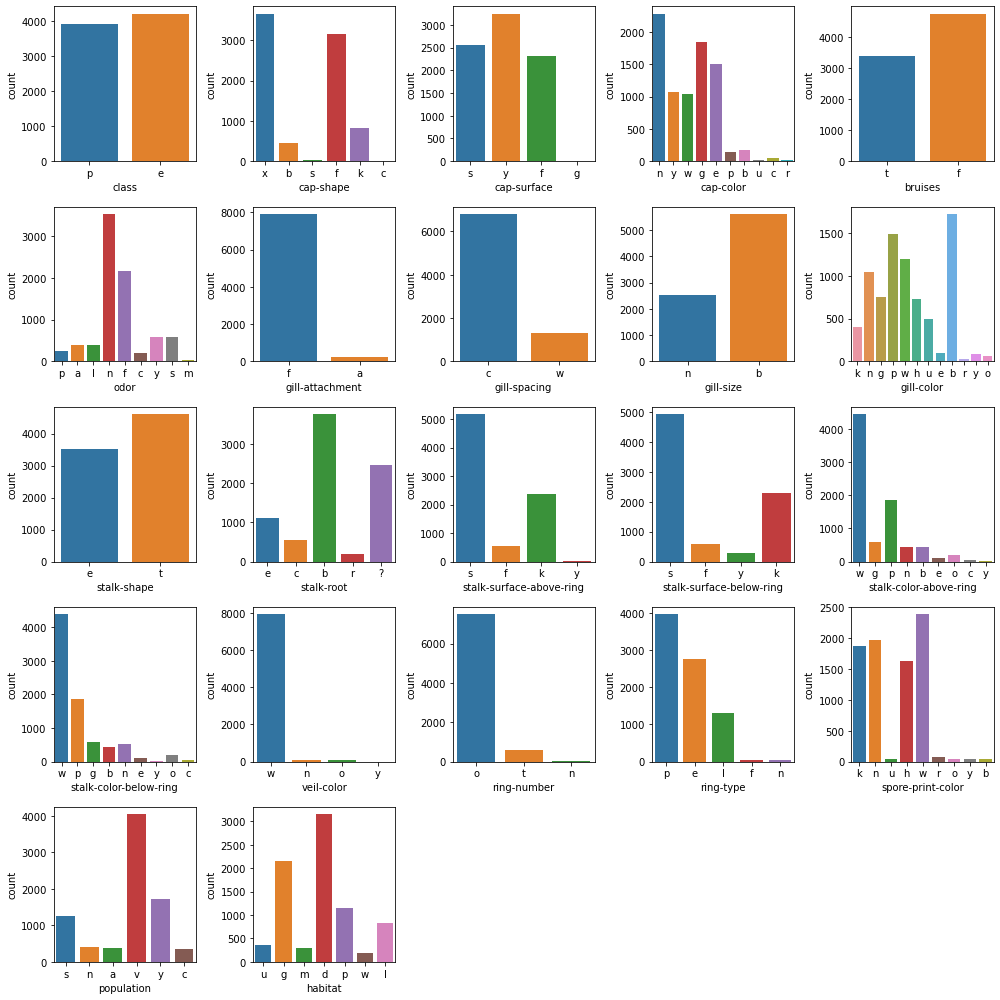

In [40]:
plt.figure(figsize=(14,14))
for i in range (len(col)):
    plt.subplot(5,5,i+1)
    sns.countplot(x=col[i],data=ds)
    plt.tight_layout()

             Observation:
Label ( class) - data count is mostly similar 
features -                   
           As per count                   
- Bruishes                      F- type >  t - type                
- Gill attached                 F- type >> A - type                       
- Gill spacing                  c- type >  w - type                    
- gill size                     B- type >  n - type                       
- stalk shape                   T- type >  e - type                    
- Ring number                   o-type                   
                                              
    Most in numbers  
- cap shape                        x, f                  
- Odor                             n, f                  
- Population                         v                 
- habitat                          d, g                     
- spore print                     k,n,h,w                   



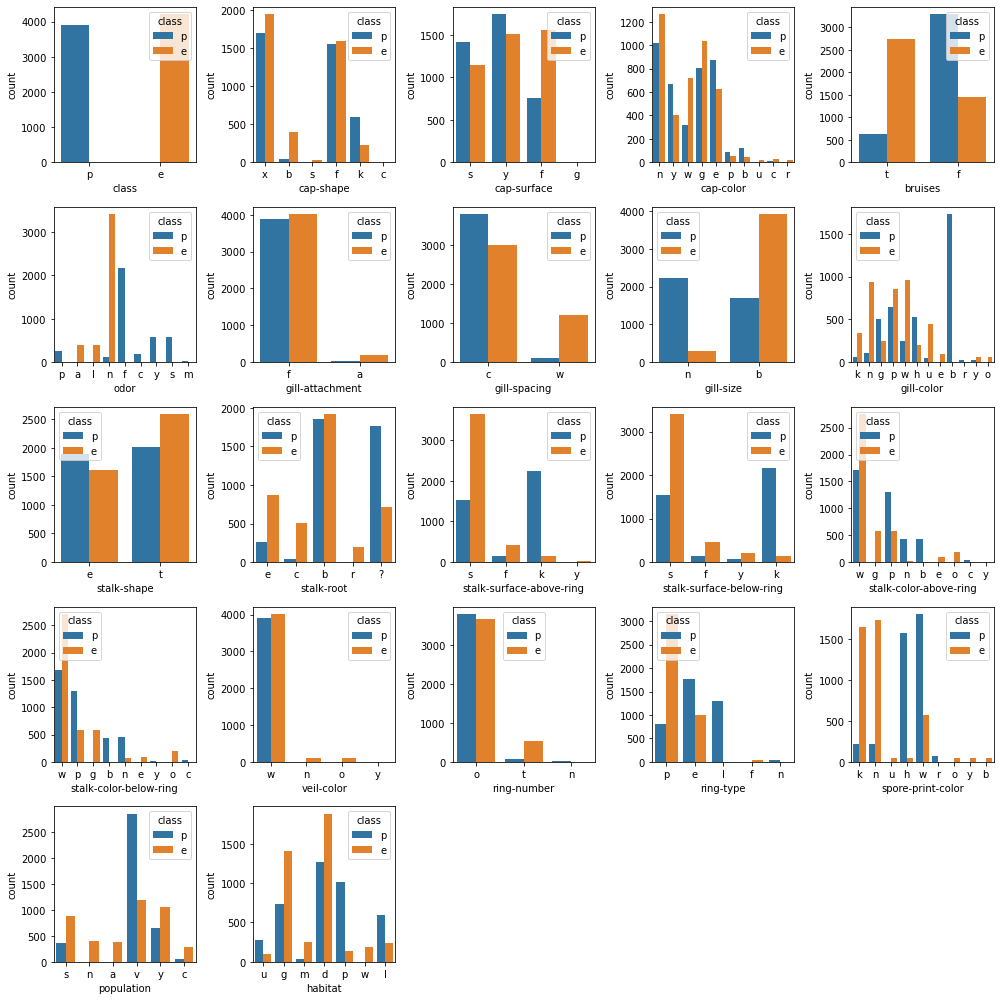

In [41]:
#PLOTTING label versus feature 
plt.figure(figsize=(14,14))
for i in range(len(col)):
    plt.subplot(5,5,i+1)
    sns.countplot(x=col[i], hue='class',data= ds)
    plt.tight_layout()

                 OBSERVATION 
- Bruises - type are mostly edible and f type are mostly poisonous                          
- odor - N,a,l type are mostly edible and p,f,c,y,s are poisonous mostly                    
- gill color - k,n,u,o are mostly edible and B type is poisonous                       
- population - n,a,c are mostly edible   and v type is mostly poisonous                 
- spore print color - k,n,o,y,b are mostly edible and h,w,r are mostly poisonous 
- ring type - l, f are mostly poisonous 
- stalk root e,c are mostly edible and ? is mmostly poisonous 

# Feature Engineering

In [43]:
LE= LabelEncoder()

In [44]:
for x in ds.columns:
       ds[x]=LE.fit_transform(ds[x])

In [45]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


Class 1= poisonous and 0 = edible 

In [46]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

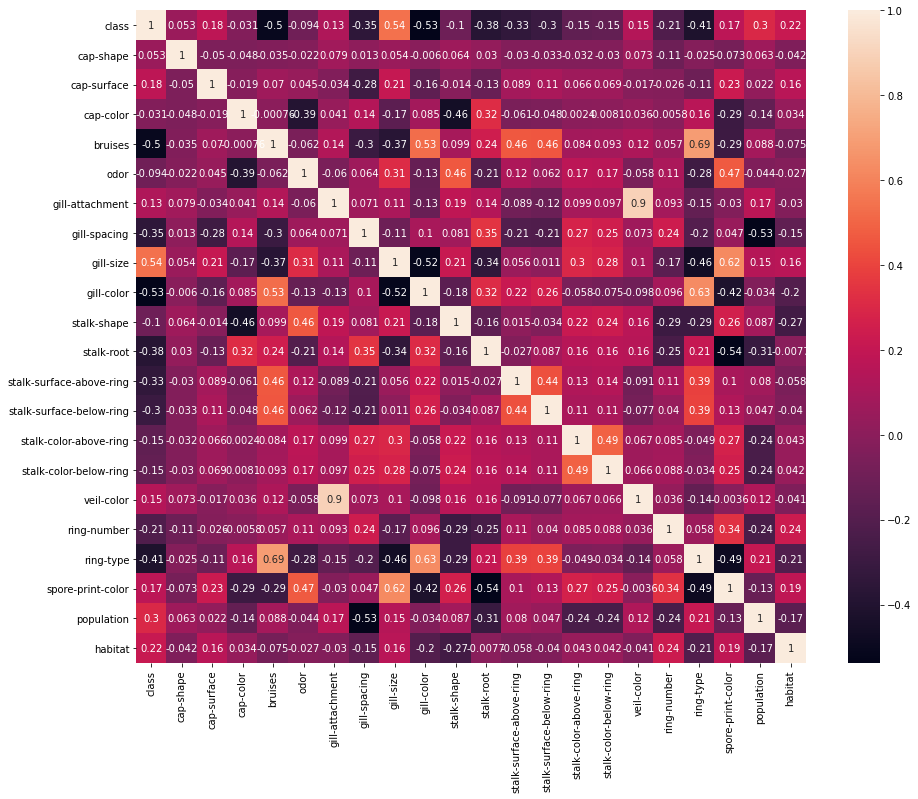

In [47]:
plt.figure(figsize=(15,12))
sns.heatmap(ds.corr(), annot=True)
plt.show()

Just looking at 1 column or 1 row  of heatmap we can see the correlation of label with other features which seems to be good for furthure analysis 

In [48]:
ds.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

# splitting data in to X and Y 

In [52]:
X=ds.drop(columns='class')

In [53]:
y=ds['class']

# training and testing data 

In [54]:
x_train, x_test,y_train,y_test = train_test_split(X,y, test_size=.3)

# Machine learing Modeling 

LOGISTIC REGRESSION 

In [67]:
lr=LogisticRegression()

In [68]:
lr.fit(x_train, y_train)

F:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_pre= lr.predict(x_test)

In [70]:
lr.score(x_test,y_test)

0.9511894995898277

In [71]:
print('logistic regression \n', classification_report(y_test, y_pre))
print('acuuracy score ', accuracy_score(y_test, y_pre))
print('confusion matrices \n ', confusion_matrix(y_test,y_pre))

logistic regression 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1293
           1       0.95      0.95      0.95      1145

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438

acuuracy score  0.9511894995898277
confusion matrices 
  [[1235   58]
 [  61 1084]]


         OBSERVATION
- Accuracy - 95%
- 1235 true edible                                     

Type 1 error 
- 58 false edible (no. of predictions which are poisonous but predicted edible  ------ should be low)                             

Type 2 error 
- 61 false poisonous( no. of prediction which edible but predicted poisonous )


----------------------------------------------------------------------------------------

DECISION TREE CLASSIFIER 

In [72]:
clf= DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred= clf.predict(x_test)

In [73]:
clf.score(x_test,y_test)

1.0

In [74]:
print('decision tree classification /n', classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


decision tree classification /n               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1293
           1       1.00      1.00      1.00      1145

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

1.0
[[1293    0]
 [   0 1145]]


In [75]:
clf2= DecisionTreeClassifier(criterion= 'entropy' ,max_depth=24 , min_samples_leaf=1 )
clf2.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=24)

In [76]:
clf2.score(x_test,y_test)

1.0

         OBSERVATION 
- accuracy - 100%           
 Type 1 error - 0                         
 Type 2 error - 0 

---------------------------------------------------------------

RANDOM FOREST CLASSIFIER 

In [77]:
rand_clf = RandomForestClassifier()
rand_clf.fit(x_train , y_train)
y_pred2= rand_clf.predict(x_test)

In [78]:
rand_clf.score(x_test , y_test)
print('Random forest /n', classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred2))

Random forest /n               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1293
           1       1.00      1.00      1.00      1145

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

1.0
[[1293    0]
 [   0 1145]]


         OBSERVATION 
- accuracy - 100%           
 Type 1 error - 0                         
 Type 2 error - 0 

----------------------------------

# Saving the model 

As decision tree models predicts well so will save that model 

In [80]:
from sklearn import externals
import joblib

In [81]:
joblib.dump(clf, 'mushroom.pkl')

['mushroom.pkl']

# Loading the model 

In [82]:
model= joblib.load('mushroom.pkl')
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

1.0